<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [8]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
DATA_X = pd.read_csv("Train/Train/X_station_train.csv")
DATA_Y = pd.read_csv("Train/Train/Y_train.csv")
COORDS = pd.read_csv("Other/Other/stations_coordinates.csv")
prout = pd.read_csv("polaki.csv")

In [7]:
prout.groupby("number_sta").mean()

,ff,t,td,hu,dd,precip,max_t,min_t,max_ff,min_ff,max_td,min_td,max_hu,min_hu,mean_dd,max_precip,min_precip
number_sta,,,,,,,,,,,,,,,,,
14066001,4.255939,284.944430,281.595258,80.800802,196.742004,0.079711,308.81,267.91,20.61,0.0,294.88,266.02,99.3,27.5,196.742004,14.9,0.0
14126001,NaN,284.616017,282.325057,87.140469,NaN,0.062474,309.25,265.85,NaN,NaN,294.55,265.75,99.0,28.0,NaN,10.0,0.0
14137001,4.016765,284.568835,281.295591,81.792968,204.500866,0.076184,308.95,265.09,20.52,0.0,294.50,263.99,100.0,25.2,204.500866,15.4,0.0
14216001,3.034672,284.497981,280.931299,80.531124,207.596797,0.081724,309.15,266.53,13.29,0.0,293.21,265.03,100.0,23.6,207.596797,24.3,0.0
14296001,NaN,283.417831,NaN,NaN,NaN,0.128194,306.46,267.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86149001,NaN,281.006329,NaN,NaN,NaN,0.089744,284.90,276.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
86165005,2.691349,285.729780,281.051342,76.765650,179.069880,0.079490,311.29,265.72,14.32,0.0,294.22,261.25,100.0,11.4,179.069880,14.0,0.0
86272002,NaN,285.615292,NaN,NaN,NaN,0.075736,310.95,266.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4,0.0


<AxesSubplot:>

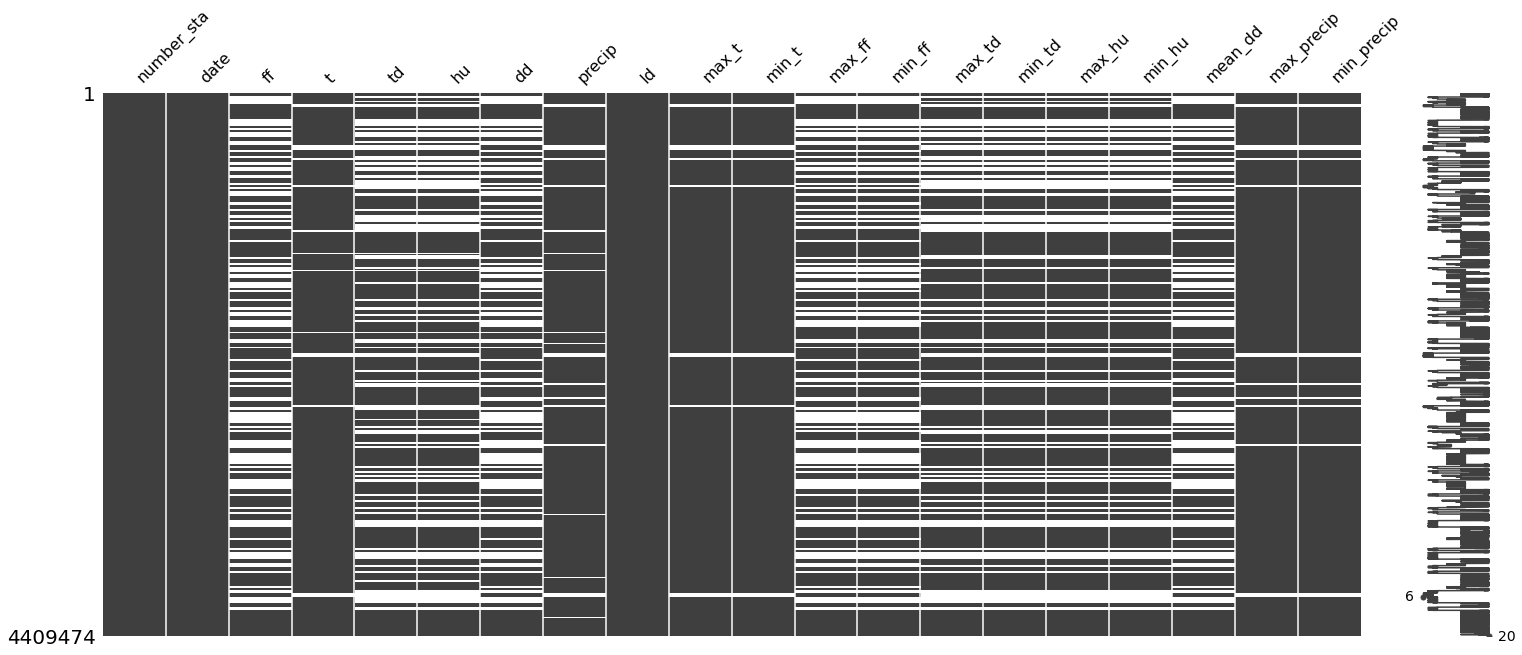

In [9]:
msno.matrix(prout)

In [3]:
train = DATA_X.copy()
y = DATA_Y.copy()
coords = COORDS.copy()

In [4]:
train["month"] = train["date"].replace(to_replace="^.{5}", value="", regex=True)\
                              .replace(to_replace=".{12}$", value="", regex=True)

train["day"] = train["date"].replace(to_replace="^.{8}", value="", regex=True)\
                            .replace(to_replace=".{9}$", value="", regex=True)

train["hour"] = train["date"].replace(to_replace="^.{11}", value="", regex=True)\
                             .replace(to_replace=".{6}$", value="", regex=True)

In [5]:
train = train.merge(coords, how="left", on="number_sta")

In [6]:
train["Id_short"] = train["Id"].replace(to_replace=".\d+$", value="", regex=True)

In [7]:
train

,number_sta,date,ff,t,td,hu,dd,precip,Id,month,day,hour,lat,lon,height_sta,Id_short
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,01,01,00,49.334,-0.431,2.0,14066001_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,01,01,01,49.334,-0.431,2.0,14066001_0
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,01,01,02,49.334,-0.431,2.0,14066001_0
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,01,01,03,49.334,-0.431,2.0,14066001_0
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,01,01,04,49.334,-0.431,2.0,14066001_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,12,30,19,49.108,1.831,126.0,95690001_729
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,12,30,20,49.108,1.831,126.0,95690001_729
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,12,30,21,49.108,1.831,126.0,95690001_729
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,12,30,22,49.108,1.831,126.0,95690001_729


In [8]:
train.isna().sum()

number_sta          0
date                0
ff            1750817
t              231013
td            1428352
hu            1425877
dd            1752650
precip         310298
Id                  0
month               0
day                 0
hour                0
lat                 0
lon                 0
height_sta          0
Id_short            0
dtype: int64

In [9]:
train.t.fillna(np.mean(train.t))

0          279.28
1          278.76
2          278.27
3          277.98
4          277.32
            ...  
4409469    286.68
4409470    286.39
4409471    286.28
4409472    286.21
4409473    285.92
Name: t, Length: 4409474, dtype: float64

In [ ]:
train = train.fillna(np.mean(train))

In [ ]:
np.mean(train)